<h1>Business Problem – Prospects of a Fine Dining Restaurant, close to office areas in Mumbai, India.</h1>

<B><I>Mumbai (Bombay)</I></B> is the capital city of the Indian state of Maharashtra. With an estimated population of over 12.4 million (and counting) it was named as an alpha world city in 2008. It is home to the highest number of millionaires and billionaires in India. It’s culture is a blend of traditional festivals, food, music and theatres. The city offers a cosmopolitan and diverse lifestyle with a variety of food, entertainment and night life. This is a city which never sleeps. 
Summary about cost of living in Mumbai:
<ul>
<li>Four person family monthly costs: USD 1295 without rent</li>
<li>A single person monthly costs: USD 370 without rent</li>
<li>Cost of living rank 349th out of 388 cities in the world</li>
<li>Mumbai has a cost of living index of 29.41</li>
</ul>
Mumbai being the financial capital of India has several large conglomerates which houses a large number of professionals, visiting foreign delegates, CXO level dignitaries who often times prefer fine dining places as extended work areas to have business related discussions over good food and wine. In this exercise we will go through the benefits and drawbacks of opening a fine dine restaurant in places of high density offices. Usually, the fine dining restaurants are priced between USD 250 to USD 300 per meal, which includes light beverages. The profit margin that the restaurants usually make is in the range of 25% to 35%. However, there is very stiff competition to such fine dining restaurants which comes not only from their category but also from other eating places which is more of casual dining, pubs and sports bars.  

<B>Target Audience</B>
Category of people who would show interest in this study?
<ul><li>Entrepreneurs and business professionals who would like to venture into the restaurant business. This analysis should give an idea to start a fine dining restaurant in densely populated office places in Mumbai.</li>
<li>Small investors who have a passion for food and would like to try a hand at setting up their own restaurant.</li> 
<li>Office professionals who would like to take their colleagues, clients, foreign visitors for a fine dining experience which would be convenient to reach from an office.</li></ul>


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors




In [2]:
# Set the URL you want to webscrape from
url = 'http://www.demographia.com/db-mumbaidistr91.htm'

html = urlopen(url)


soup = BeautifulSoup(html, 'lxml')
type (soup)


#Get the title of the site
title = soup.title
print(title)

rows = soup.find_all('tr')
#print(rows[:10])

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean,'',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

df = pd.DataFrame(list_rows)

#split the "0" column into multiple columns at the comma position
df1 = df[0].str.split(',', expand=True)
#df1.head(20)

df1 = df1.replace('\n','', regex=True)
df1 = df1.replace('\r','', regex=True)

df1 = df1.replace(r'\[',' ', regex=True)
df1 = df1.replace(r'\]',' ', regex=True)


df2 = df1.rename(columns=df1.iloc[2])

#strip column names of whitespaces

df2.columns = df2.columns.str.strip()
df2.head(100)

<title>Mumbai Wards &amp; Districts: Population &amp; Density by Sector 2001
</title>
[

Demographia is "pro-choice" with respect to urban development. People should have the freedom to live and work
 where and how they like.
]


,Ward,Area,Land Area (SKM),Households,Population,Density per Square Kilometer,Density per Square Mile,None,None,None,...,None,None,None,None,None,None,None,None,None,None
0,Mumbai Wards &amp; Districts: Population &amp...,3543,338,03143,447112,528AColaba12.543,661210,84716,86843,687BSanhurst Road2.527,...,20.7%,Demographia: Affiliated with The Public Purpose,Twice A National Journal Top Internet SiteDem...,,,,,,,"Demographia is ""pro-choice"" with respect to u..."
1,WARDS,,,,,,,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Ward,Area,Land Area (SKM),Households,Population,Density per Square Kilometer,Density per Square Mile,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,ISLAND CITY DISTRICT,76.8,677,354,3,338,031,43,447,112,...,None,None,None,None,None,None,None,None,None,None
4,A,Colaba,12.5,43,661,210,847,16,868,43,...,None,None,None,None,None,None,None,None,None,None
5,B,Sanhurst Road,2.5,27,225,140,633,56,936,147,...,None,None,None,None,None,None,None,None,None,None
6,C,Marine Lines,1.8,39,657,202,922,114,001,295,...,None,None,None,None,None,None,None,None,None,None
7,D,Grant Road,6.6,79,131,382,841,57,744,149,...,None,None,None,None,None,None,None,None,None,None
8,E,Byculla,7.4,80,970,440,335,59,505,154,...,None,None,None,None,None,None,None,None,None,None
9,F South,Parel,14.0,80,777,396,122,28,294,73,...,None,None,None,None,None,None,None,None,None,None


In [3]:
df2.drop(df2.index[[0,1,2,3,13,29,30,31,32,33,34,35,36,37,38,39,40,41]], inplace=True)


df2 = df2.replace('Sanhurst Road','Sandhurst Road', regex=True)
df2 = df2.replace('Elphinstone','Elphinstone Road', regex=True)
df2 = df2.replace('Dadar/Plaza','Dadar (West)', regex=True)
df2 = df2.replace('Bandra','Bandra (West)', regex=True)
df2 = df2.replace('Kurla','Kurla (West)', regex=True)
df2 = df2.replace('Malad','Malad (West)', regex=True)
df2 = df2.replace('Kandivalli','Kandivali (West)', regex=True)
df2 = df2.replace('Dahiser','Dahisar (West)', regex=True)

In [4]:

df3 = df2[['Ward','Area','Land Area (SKM)','Households','Population','Density per Square Kilometer','Density per Square Mile']]
df3.reset_index(drop=True, inplace=True)


df3.head(100)



,Ward,Area,Land Area (SKM),Households,Population,Density per Square Kilometer,Density per Square Mile
0,A,Colaba,12.5,43,661,210,847
1,B,Sandhurst Road,2.5,27,225,140,633
2,C,Marine Lines,1.8,39,657,202,922
3,D,Grant Road,6.6,79,131,382,841
4,E,Byculla,7.4,80,970,440,335
5,F South,Parel,14.0,80,777,396,122
6,F North,Matunga,13.0,112,765,524,393
7,G South,Elphinstone Road,10.0,92,525,457,931
8,G North,Dadar (West),9.1,120,643,582,007
9,H East,Khar/Santacruz,13.5,114,423,580,835


<b>Data Preparation</b>
We would scrape information from the site hosted on the Mumbai Wards and Districts (http://www.demographia.com/db-mumbaidistr91.htm) and create a data frame. We would be using “requests” and “Beautifulsoup4library” to create a data frame with all the wards, area, population and density per square mile of Mumbai.


<b>Getting Co-ordinates of the Major Districts : Geopy Client</b>
Get the co-ordinates of these 23 major districts using geocoder class of Geopy client.  Few of the districts returned incorrect co-ordinates for the latitude and longitude. So, the area values had to be corrected with the correct values and then the data-frame generated was as below.


In [208]:
#!conda install -c conda-forge geocoder --yes



In [6]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Mumbai_explorer")


#df3["Latitude"]=df3["Area"].apply(geolocator.geocode).apply(lambda x: x.latitude if x != None else None)
df3["Longitude"]=df3["Area"].apply(geolocator.geocode).apply(lambda x1: x1.longitude if x1 != None else None)


df3.head(100)


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Ward,Area,Land Area (SKM),Households,Population,Density per Square Kilometer,Density per Square Mile,Longitude,Latitude
0,A,Colaba,12.5,43,661,210,847,72.825969,18.915091
1,B,Sandhurst Road,2.5,27,225,140,633,72.839372,18.960924
2,C,Marine Lines,1.8,39,657,202,922,72.823816,18.945616
3,D,Grant Road,6.6,79,131,382,841,72.813573,18.964447
4,E,Byculla,7.4,80,970,440,335,72.832794,18.976622
5,F South,Parel,14.0,80,777,396,122,72.837661,19.009482
6,F North,Matunga,13.0,112,765,524,393,72.850147,19.027436
7,G South,Elphinstone Road,10.0,92,525,457,931,72.842505,19.008427
8,G North,Dadar (West),9.1,120,643,582,007,72.838224,19.023889
9,H East,Khar/Santacruz,13.5,114,423,580,835,72.834073,19.073628


# Foursquare Data

In [41]:
#!conda install -c conda-forge folium=0.5.0 --yes

In [7]:
#Define foursquare credentials

CLIENT_ID = 'LBUZ5DGOSVN4OU1P53W3KVYUHGJ2RHXB4JRE1XK1OEFQSF5N' # your Foursquare ID
CLIENT_SECRET = 'GG3ZGACH2RFQEJ4LSCUP3L52K0CPK2XENF10BHG5430FXQ0N' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

#build your search query
search_query = 'Restaurants'
radius = 5000
print(search_query + ' .... OK!')


Your credentails:
CLIENT_ID: LBUZ5DGOSVN4OU1P53W3KVYUHGJ2RHXB4JRE1XK1OEFQSF5N
CLIENT_SECRET:GG3ZGACH2RFQEJ4LSCUP3L52K0CPK2XENF10BHG5430FXQ0N
Restaurants .... OK!


In [34]:
# Lets explore the Khar/SantaCruz areas
latitude = df3.Latitude[9]
longitude = df3.Longitude[9]
print(latitude, longitude)

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

results = requests.get(url).json()
results

'There are {} around {}.'.format(len(results['response']['groups'][0]['items']), search_query)

19.0736276 72.8340726


'There are 30 around Restaurants.'

In [35]:
# assign relevant part of JSON to venues
#venues = results['response']['venues']

items = results['response']['groups'][0]['items']
items[0]

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'shortName': 'Chinese', 'primary': True, 'id...",False,4b0587d7f964a520dfa322e3,T H Kataria Marg,IN,Mumbai,India,near Hinduja Hospital,4648,"[T H Kataria Marg (near Hinduja Hospital), Mum...","[{'lat': 19.03214225116908, 'lng': 72.83911273...",19.032142,72.839113,400 016,Mahārāshtra,Status Restaurants & Bar,v-1561942223
1,"[{'shortName': 'Indian', 'primary': True, 'id'...",False,51ddacc6498ef2136fbed86f,Airport Road,IN,Mumbai,India,NaN,3221,"[Airport Road, Mumbai, Mahārāshtra, India]","[{'lat': 19.095712, 'lng': 72.85386, 'label': ...",19.095712,72.853860,NaN,Mahārāshtra,Aafrein Restaurant - Sahara Star,v-1561942223
2,"[{'shortName': 'Indian', 'primary': True, 'id'...",False,532c6ee2498edd7f29bad5d4,NaN,IN,NaN,India,NaN,4555,[India],"[{'lat': 19.09782175109064, 'lng': 72.86899709...",19.097822,72.868997,NaN,NaN,kinara restaurant sahar,v-1561942223


In [36]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Candies,Fast Food Restaurant,"Union Park, Bandra West",IN,Mumbai,India,Near Carter Road,903,"[Union Park, Bandra West (Near Carter Road), M...","[{'lat': 19.070288312673544, 'label': 'display...",19.070288,72.826245,NaN,NaN,Mahārāshtra,4b812df7f964a5208f9930e3
1,Bombay Salad Co.,Salad Place,"Rita Apartment, 16th road, Lane next to Mini P...",IN,Mumbai,India,Opposite syndicate bank,1046,"[Rita Apartment, 16th road, Lane next to Mini ...","[{'lat': 19.064715341256164, 'label': 'display...",19.064715,72.830920,NaN,400050,Mahārāshtra,5496e94e498e349305d81639
2,Smoke House Deli,Deli / Bodega,Pali Naka,IN,Mumbai,India,Dr. B. R. Ambedkar Road,1009,"[Pali Naka (Dr. B. R. Ambedkar Road), Mumbai 4...","[{'lat': 19.06548155786204, 'label': 'display'...",19.065482,72.829861,NaN,400051,Mahārāshtra,52beeef511d29221dcfc53e3
3,Bombay Coffee House,Café,Waterfield Road,IN,NaN,India,Bandra West,1137,"[Waterfield Road (Bandra West), Mahārāshtra, I...","[{'lat': 19.063424743075647, 'label': 'display...",19.063425,72.834671,NaN,NaN,Mahārāshtra,56e3bcf6498e13373cb379c6
4,Indigo Deli,Deli / Bodega,Pali Hill,IN,Mumbai,India,Bandra,1395,"[Pali Hill (Bandra), Mumbai, Mahārāshtra, India]","[{'lat': 19.06171028998035, 'label': 'display'...",19.061710,72.829972,NaN,NaN,Mahārāshtra,4f927a04e4b020d1a28662c8
5,Jai Jawan,Seafood Restaurant,Off Linking Road,IN,Mumbai,India,Bandra West,638,"[Off Linking Road (Bandra West), Mumbai, Mahār...","[{'lat': 19.068091901360628, 'label': 'display...",19.068092,72.832468,NaN,NaN,Mahārāshtra,4eff27b1e5faf2869b1aba6f
6,Khane Khas,Indian Restaurant,"16th Rd., TPS Bandra (W)",IN,Mumbai,India,16th & 33rd Rd,961,"[16th Rd., TPS Bandra (W) (16th & 33rd Rd), Mu...","[{'lat': 19.065485032903197, 'label': 'display...",19.065485,72.831034,NaN,400050,Mahārāshtra,4bd31e0b41b9ef3b5d49ffe5
7,Global Fusion,Sushi Restaurant,Link Square Mall,IN,Mumbai,India,"Linking Road, Bandra (W)",941,"[Link Square Mall (Linking Road, Bandra (W)), ...","[{'lat': 19.065174038697997, 'label': 'display...",19.065174,72.833956,NaN,400050,Mahārāshtra,4b0587d9f964a5201ca422e3
8,Fatty Bao,Asian Restaurant,"Summerville, junction of 14th & 33rd,",IN,Mumbai,India,"Linking Road, next to Monkey Bar, Bandra (W)",926,"[Summerville, junction of 14th & 33rd, (Linkin...","[{'lat': 19.065482765017773, 'label': 'display...",19.065483,72.832272,NaN,NaN,Mahārāshtra,559660fe498ea7a4f8512cb0
9,Punjab Sweet House And Restaurant,Indian Restaurant,pali naka,IN,Mumbai,India,bandra west,1326,"[pali naka (bandra west), Mumbai, Mahārāshtra,...","[{'lat': 19.06255314675695, 'label': 'display'...",19.062553,72.829423,NaN,NaN,Mahārāshtra,4be958699a54a593eaee0a11


In [37]:
dataframe_filtered.name

0                               Candies
1                      Bombay Salad Co.
2                      Smoke House Deli
3                   Bombay Coffee House
4                           Indigo Deli
5                             Jai Jawan
6                            Khane Khas
7                         Global Fusion
8                             Fatty Bao
9     Punjab Sweet House And Restaurant
10                              Bastian
11                      One Street Over
12                      Out of the Blue
13                    Pali Village Café
14                           Sandwizzaa
15                              Candies
16                            Mac Craig
17                          Pali Bhavan
18                       Between Breads
19                              Gostana
20                        Carter's Blue
21                              Suzette
22                          Ram & Shyam
23                  Jai Hind Lunch Home
24                          Wok Express


In [38]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


# add Ecco as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Ecco',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

#    # Analyze the neighborhood

In [10]:
# type your answer here

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d1958cf9ba3e5002cf44f69'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d145941735',
      'name': 'Chinese Restaurant',
      'pluralName': 'Chinese Restaurants',
      'primary': True,
      'shortName': 'Chinese'}],
    'hasPerk': False,
    'id': '4b0587d7f964a520dfa322e3',
    'location': {'address': 'T H Kataria Marg',
     'cc': 'IN',
     'city': 'Mumbai',
     'country': 'India',
     'crossStreet': 'near Hinduja Hospital',
     'distance': 4648,
     'formattedAddress': ['T H Kataria Marg (near Hinduja Hospital)',
      'Mumbai 400 016',
      'Mahārāshtra',
      'India'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 19.03214225116908,
       'lng': 72.83911273765527}],
     'lat': 19.03214225116908,
     'lng': 72.83911273765527,
     'postalCode': '400 016',
     'state': 'Mahārāshtra'},
    'name': '

In [11]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [12]:
venues = results['response']['venues']
    
nearby_venues = json_normalize(venues) # flatten JSON
#nearby_venues.head()

# filter columns
filtered_columns = ['name', 'categories', 'location.lat', 'location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(25)

#print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

,name,categories,lat,lng
0,Status Restaurants & Bar,Chinese Restaurant,19.032142,72.839113
1,Aafrein Restaurant - Sahara Star,Indian Restaurant,19.095712,72.853860
2,kinara restaurant sahar,Indian Restaurant,19.097822,72.868997


In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
# type your answer here

mumbai_venues = getNearbyVenues(names=df3['Area'],
                                   latitudes=df3['Latitude'],
                                   longitudes=df3['Longitude']
                                  )



 Colaba
 Sandhurst Road
 Marine Lines
 Grant Road
 Byculla
 Parel
 Matunga
 Elphinstone Road
 Dadar (West)
 Khar/Santacruz
 Bandra (West)
 Andheri (East)
 Andheri (West)
 Kurla (West)
 Chembur East
 Chembur West
 Ghatkopar
 Goregaon
 Malad (West)
 Kandivali (West)
 Borivali West
 Dahisar (West)
 Bhandup
 Mulund


In [15]:
print(mumbai_venues.shape)
mumbai_venues.head()

(358, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Colaba,18.915091,72.825969,Charagh Din,18.915254,72.824151,Men's Store
1,Colaba,18.915091,72.825969,Moshe's,18.917572,72.824470,Mediterranean Restaurant
2,Colaba,18.915091,72.825969,IMBISS Meating Joint,18.917157,72.827018,German Restaurant
3,Colaba,18.915091,72.825969,Jean Claude Biguine Salon,18.914867,72.823843,Spa
4,Colaba,18.915091,72.825969,Cafe Coffee Day,18.915244,72.824160,Coffee Shop


In [16]:
mumbai_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Andheri (East),12,12,12,12,12,12
Andheri (West),20,20,20,20,20,20
Bandra (West),30,30,30,30,30,30
Bhandup,5,5,5,5,5,5
Borivali West,17,17,17,17,17,17
Byculla,9,9,9,9,9,9
Chembur East,9,9,9,9,9,9
Chembur West,29,29,29,29,29,29
Colaba,14,14,14,14,14,14


In [17]:
print('There are {} uniques categories.'.format(len(mumbai_venues['Venue Category'].unique())))

There are 97 uniques categories.


In [18]:
# one hot encoding
mumbai_onehot = pd.get_dummies(mumbai_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mumbai_onehot['Neighborhood'] = mumbai_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [mumbai_onehot.columns[-1]] + list(mumbai_onehot.columns[:-1])
mumbai_onehot = mumbai_onehot[fixed_columns]

mumbai_onehot.head(50)

,Neighborhood,Accessories Store,Arcade,Asian Restaurant,Bagel Shop,Bakery,Bank,Bar,Beach,Boat or Ferry,...,Soup Place,South Indian Restaurant,Spa,Sporting Goods Shop,Tea Room,Thai Restaurant,Track,Train Station,Vegetarian / Vegan Restaurant,Zoo
0,Colaba,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Colaba,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Colaba,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Colaba,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Colaba,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Colaba,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Colaba,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Colaba,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Colaba,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Colaba,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
mumbai_onehot.shape

(358, 98)

In [20]:
mumbai_grouped = mumbai_onehot.groupby('Neighborhood').mean().reset_index()
mumbai_grouped


#lets print each neighborhood with the top 5 most common venues
num_top_venues = 5

for hood in mumbai_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = mumbai_grouped[mumbai_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Andheri (East)----
               venue  freq
0  Indian Restaurant  0.25
1        Pizza Place  0.08
2              Hotel  0.08
3      Shopping Mall  0.08
4             Lounge  0.08


---- Andheri (West)----
                  venue  freq
0     Indian Restaurant  0.35
1                   Pub  0.15
2           Coffee Shop  0.15
3                  Café  0.10
4  Gym / Fitness Center  0.05


---- Bandra (West)----
                  venue  freq
0     Indian Restaurant  0.13
1                Bakery  0.13
2  Gym / Fitness Center  0.07
3                  Café  0.07
4          Gourmet Shop  0.07


---- Bhandup----
                venue  freq
0        Dessert Shop   0.2
1       Train Station   0.2
2   Indian Restaurant   0.2
3  Falafel Restaurant   0.2
4           Multiplex   0.2


---- Borivali West----
                           venue  freq
0             Chinese Restaurant  0.18
1              Indian Restaurant  0.12
2  Vegetarian / Vegan Restaurant  0.12
3                    Snack Place  0

In [21]:
#lets put it into a pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]



#lets create a new datafram and display top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mumbai_grouped['Neighborhood']

for ind in np.arange(mumbai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mumbai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Andheri (East),Indian Restaurant,Pizza Place,Bar,Lounge,Chinese Restaurant,Shopping Mall,Ice Cream Shop,Camera Store,Hotel,Vegetarian / Vegan Restaurant
1,Andheri (West),Indian Restaurant,Coffee Shop,Pub,Café,Gym / Fitness Center,Nightclub,Vegetarian / Vegan Restaurant,Bagel Shop,Modern European Restaurant,Fast Food Restaurant
2,Bandra (West),Bakery,Indian Restaurant,Gym / Fitness Center,Café,Snack Place,Gourmet Shop,Asian Restaurant,Arcade,Event Space,Deli / Bodega
3,Bhandup,Train Station,Multiplex,Dessert Shop,Indian Restaurant,Falafel Restaurant,Zoo,Flea Market,Donut Shop,Electronics Store,Event Space
4,Borivali West,Chinese Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Ice Cream Shop,Dessert Shop,Molecular Gastronomy Restaurant,Asian Restaurant,Park,Lounge,Food Truck


In [22]:
#

# Cluster the neighborhoods

In [49]:
# set number of clusters
kclusters = 5

mumbai_grouped_clustering = mumbai_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mumbai_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


# add clustering labels
mumbai_merged = df3

# merge mumbai_grouped with mumbai_data to add latitude/longitude for each neighborhood
mumbai_merged = mumbai_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Area')

mumbai_merged.head() # check the last columns!


,Ward,Area,Land Area (SKM),Households,Population,Density per Square Kilometer,Density per Square Mile,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A,Colaba,12.5,43,661,210,847,72.825969,18.915091,0,Chinese Restaurant,German Restaurant,Restaurant,Middle Eastern Restaurant,Coffee Shop,Hotel,Spa,Pizza Place,Men's Store,Indian Restaurant
1,B,Sandhurst Road,2.5,27,225,140,633,72.839372,18.960924,0,Indian Restaurant,Gym,Bakery,Hotel Bar,Boat or Ferry,Garden,Furniture / Home Store,Flower Shop,Donut Shop,Electronics Store
2,C,Marine Lines,1.8,39,657,202,922,72.823816,18.945616,0,Indian Restaurant,Café,Train Station,Gym,Bridal Shop,Bakery,Scenic Lookout,Chinese Restaurant,Italian Restaurant,Field
3,D,Grant Road,6.6,79,131,382,841,72.813573,18.964447,0,Park,Food Truck,Deli / Bodega,Coffee Shop,Farmers Market,Chinese Restaurant,Restaurant,Cafeteria,Lounge,Department Store
4,E,Byculla,7.4,80,970,440,335,72.832794,18.976622,0,Indian Restaurant,Zoo,Bar,History Museum,Restaurant,Park,Asian Restaurant,Bakery,Bank,Flower Shop


In [50]:
#lets visualize the clusters
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mumbai_merged['Latitude'], mumbai_merged['Longitude'], mumbai_merged['Area'], mumbai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examine the clusters

In [53]:
#Cluster 1
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 0, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]]

#Cluster 2
#mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 1, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]]

#Cluster 3
#mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 2, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]]

#Cluster 4
#mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 3, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]]

#Cluster 5
#mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 4, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]]


,Area,Density per Square Kilometer,Density per Square Mile,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Colaba,210,847,72.825969,18.915091,0,Chinese Restaurant,German Restaurant,Restaurant,Middle Eastern Restaurant,Coffee Shop,Hotel,Spa,Pizza Place,Men's Store,Indian Restaurant
1,Sandhurst Road,140,633,72.839372,18.960924,0,Indian Restaurant,Gym,Bakery,Hotel Bar,Boat or Ferry,Garden,Furniture / Home Store,Flower Shop,Donut Shop,Electronics Store
2,Marine Lines,202,922,72.823816,18.945616,0,Indian Restaurant,Café,Train Station,Gym,Bridal Shop,Bakery,Scenic Lookout,Chinese Restaurant,Italian Restaurant,Field
3,Grant Road,382,841,72.813573,18.964447,0,Park,Food Truck,Deli / Bodega,Coffee Shop,Farmers Market,Chinese Restaurant,Restaurant,Cafeteria,Lounge,Department Store
4,Byculla,440,335,72.832794,18.976622,0,Indian Restaurant,Zoo,Bar,History Museum,Restaurant,Park,Asian Restaurant,Bakery,Bank,Flower Shop
5,Parel,396,122,72.837661,19.009482,0,Bakery,Coffee Shop,Clothing Store,Sandwich Place,Movie Theater,Multiplex,Pizza Place,Café,Jewelry Store,Restaurant
6,Matunga,524,393,72.850147,19.027436,0,Indian Restaurant,Café,Fast Food Restaurant,Train Station,Vegetarian / Vegan Restaurant,Snack Place,Bar,Coffee Shop,Department Store,Convenience Store
7,Elphinstone Road,457,931,72.842505,19.008427,0,Coffee Shop,Pizza Place,Bakery,Indian Restaurant,Snack Place,Zoo,Flea Market,Dessert Shop,Donut Shop,Electronics Store
9,Khar/Santacruz,580,835,72.834073,19.073628,0,Clothing Store,Indian Restaurant,Lounge,Snack Place,Coffee Shop,Gym / Fitness Center,Pool,Furniture / Home Store,Grocery Store,Italian Restaurant
10,Bandra (West),337,391,72.830267,19.058336,0,Bakery,Indian Restaurant,Gym / Fitness Center,Café,Snack Place,Gourmet Shop,Asian Restaurant,Arcade,Event Space,Deli / Bodega


In [43]:
# create a dataframe of top 10 categories
Mumbai_Dist_Venues_Top10 = mumbai_venues['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Mumbai_Dist_Venues_Top10=Mumbai_Dist_Venues_Top10.reset_index()

Mumbai_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Mumbai_Dist_Venues_Top10

,Venue_Category,Frequency
0,Indian Restaurant,62
1,Bakery,19
2,Coffee Shop,15
3,Snack Place,14
4,Chinese Restaurant,14
5,Café,14
6,Pizza Place,12
7,Fast Food Restaurant,11
8,Restaurant,10
9,Ice Cream Shop,10


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


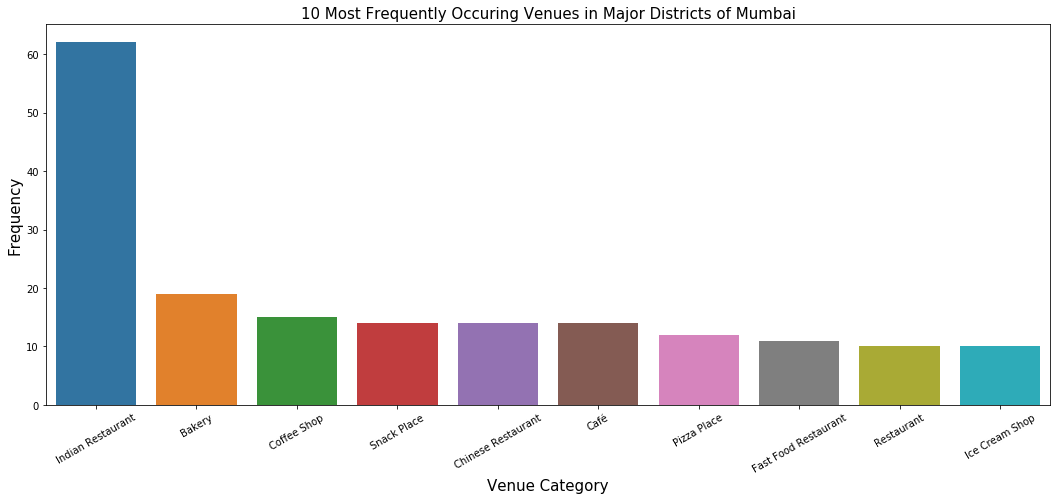

In [44]:
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data=Mumbai_Dist_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in Major Districts of Mumbai', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

In [249]:
#mumbai_onehot.info()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


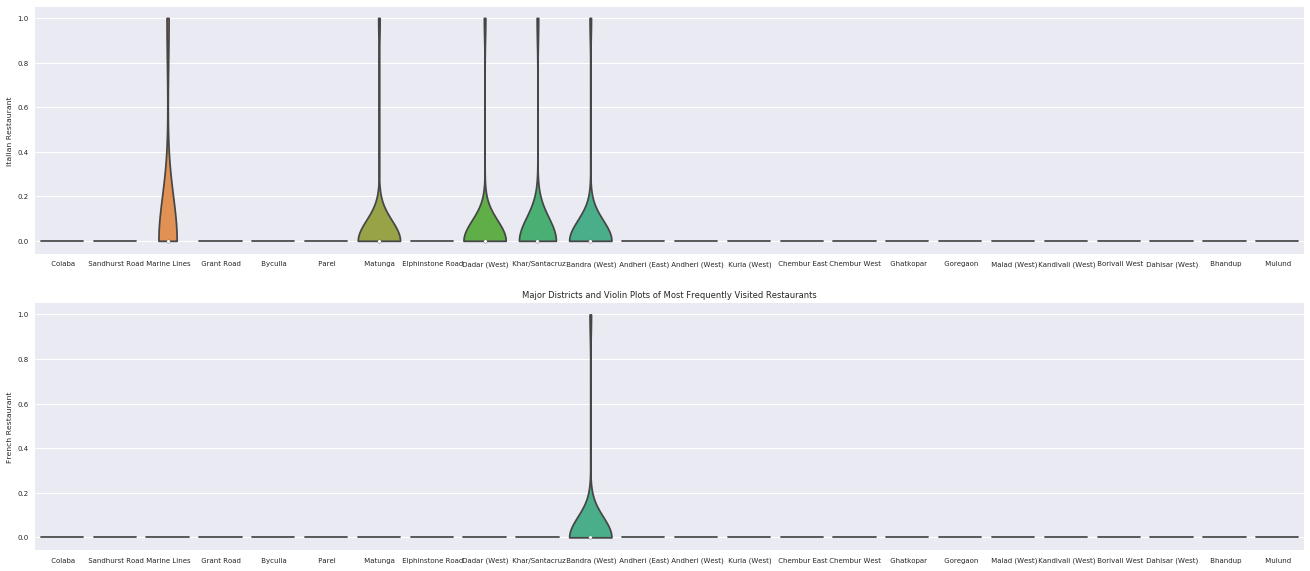

In [70]:
# Categorical plot 
fig = plt.figure(figsize=(50,10))


sns.set(font_scale=0.7)
ax = plt.subplot(2,2,1)
sns.violinplot(x="Neighborhood", y="Italian Restaurant", data=mumbai_onehot, cut=0);
#sns.catplot(x="Neighborhood", y="Chinese Restaurant", kind="box", data=mumbai_onehot);


plt.xlabel("")
ax = plt.subplot(2,2,3)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=mumbai_onehot, cut=0);
plt.xlabel("")
ax.title.set_text("Major Districts and Violin Plots of Most Frequently Visited Restaurants")

plt.show()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


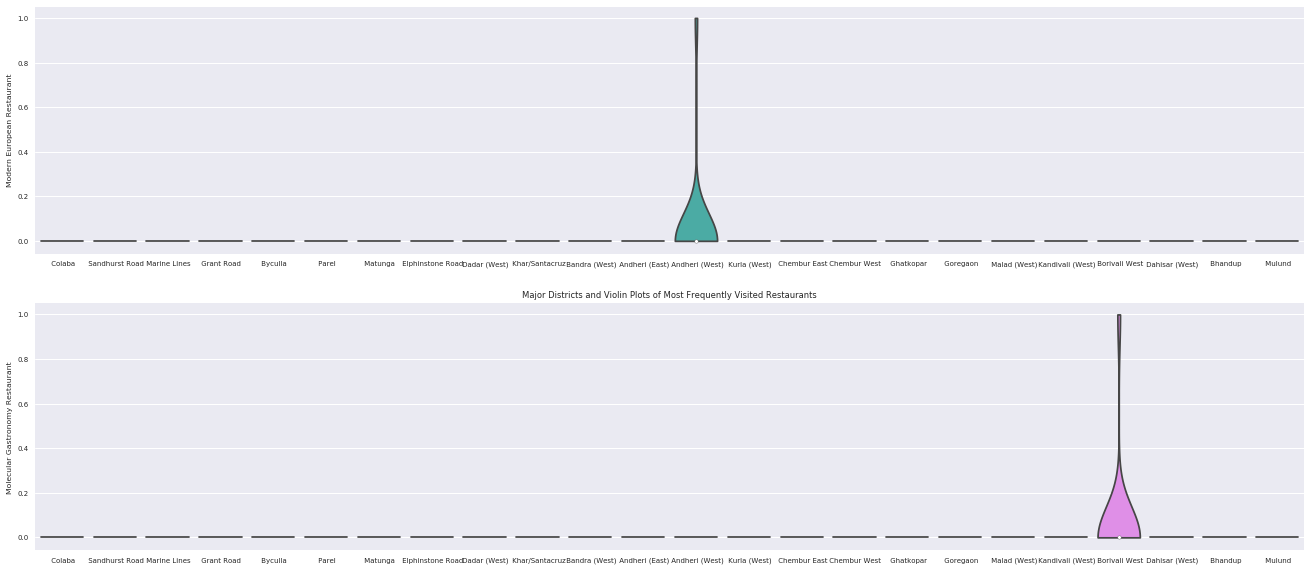

In [72]:
# Categorical plot 
fig = plt.figure(figsize=(50,10))


sns.set(font_scale=0.7)
ax = plt.subplot(2,2,1)
sns.violinplot(x="Neighborhood", y="Modern European Restaurant", data=mumbai_onehot, cut=0);
#sns.catplot(x="Neighborhood", y="Chinese Restaurant", kind="box", data=mumbai_onehot);


plt.xlabel("")
ax = plt.subplot(2,2,3)
sns.violinplot(x="Neighborhood", y="Molecular Gastronomy Restaurant", data=mumbai_onehot, cut=0);
plt.xlabel("")
ax.title.set_text("Major Districts and Violin Plots of Most Frequently Visited Restaurants")

plt.show()

# Results and Discussions

Based on the data analysis performed on the major districts of Mumbai, to arrive at a conclusion of the business goal to open a fine dining restaurant in Mumbai, the data exploration was done on types of restaurants e.g. Indian, French, Chinese, Mediterranean in some of the major districts of Mumbai like Bandra, Khar/Santacruz, Colaba, Marine Lines and Borivali West.

From the data received through Foursquare, Geopy we have found that:-
<ul>
    <li>Indian restaurants are the most common venues across the major districts of Mumbai.</li>
    <li>Bakeries come a close second followed by Pizza places, Snack joints, cafe's and Chinese restaurants.</li>
    <li>There are very few fine dining restaurants in the category of French, Italian, German, Moroccan, Modern European and Molecular Gastronomy Restaurant.</li>
    <li>Marine Lines, Matunga, Dadar, Khar/Santa Cruz and Bandra (West) are the only places in Mumbai which have any European Restaurants which typically offer fine dining restaurants.</li>
    <li>There is only one Molecular Gastronomy Restaurant in Borivali West and a Modern European Restaurant in Andheri (West).</li>
</ul>

In [67]:
#mumbai_onehot.info()